In [1]:
import scanpy as sc
import anndata
import numpy as np

In [2]:
names = {
    "pbmc": ['B', 'CD4T', 'CD8T', 'CD14+Mono', 'Dendritic', 'FCGR3A+Mono', 'NK'],
    "hpoly": ['Endocrine', 'Enterocyte', 'Enterocyte.Progenitor', 'Goblet', 'Stem', 'TA', 'TA.Early', 'Tuft'],
    "study": ['B', 'CD4T', 'CD8T', 'CD14+Mono', 'Dendritic', 'FCGR3A+Mono', 'NK'],
}
keys = {
    "pbmc": ['stimulated', 'control', 'pred', 'cell_type'],
    "hpoly": ['Hpoly.Day10', 'Control', 'pred', 'cell_label'],
    "study": ['stimulated', 'control', 'pred', 'cell_type'],
}
vaild_pbmc = sc.read("../data/valid_pbmc.h5ad")

/opt/conda/lib/python3.7/site-packages/anndata/compat/__init__.py:235: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/anndata/compat/__init__.py:235: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [3]:
cmap_names = ["viridis"]

In [4]:
def get_all_data(name, path = "", data_name = 'pbmc'):
    stim_key,ctrl_key,pred_key,cell_type_key = keys[name]
    now = []
    for cell_type in names[name]:
        adata = sc.read(path + f"{data_name}/model_{cell_type}/result.h5ad")
        stim = adata[adata.obs["condition"] == stim_key]
        stim.obs['condition'] = f"{cell_type}_real"

        # print(stim.obs['condition'])

        ctrl = adata[adata.obs["condition"] == ctrl_key]
        ctrl.obs['condition'] = f"{cell_type}_ctrl"

        # print(ctrl.obs['condition'])

        pred = adata[adata.obs["condition"] == pred_key]
        pred.obs['condition'] = f"{cell_type}_pred"

        # print(pred.obs['condition'])

        new_data = anndata.concat([stim, ctrl, pred])
        now.append(new_data)

    now = anndata.concat(now)
    return now

In [5]:
def get_all_data_others(name, path = ""):
    stim_key,ctrl_key,pred_key,cell_type_key = keys['pbmc']
    now = []
    for cell_type in names['pbmc']:
        adata = sc.read(path + f"{name}/{name}_{cell_type}.h5ad")
        stim = vaild_pbmc[(vaild_pbmc.obs["condition"] == stim_key) & (vaild_pbmc.obs[cell_type_key] == cell_type)]
        stim.obs['condition'] = f"{cell_type}_real"

        # print(stim.obs['condition'])

        ctrl = vaild_pbmc[(vaild_pbmc.obs["condition"] == ctrl_key) & (vaild_pbmc.obs[cell_type_key] == cell_type)]
        ctrl.obs['condition'] = f"{cell_type}_ctrl"

        # print(ctrl.obs['condition'])
        pred = adata[adata.obs["condition"] == pred_key]
        pred.obs['condition'] = f"{cell_type}_pred"

        # print(pred.obs['condition'])

        new_data = anndata.concat([stim, ctrl, pred])
        now.append(new_data)

    now = anndata.concat(now)
    return now

In [6]:
def view_adata(adata):
    print(adata.obs['condition'])

In [7]:
pbmc_all_data = get_all_data("pbmc", data_name = "pbmc")
hpoly_all_data = get_all_data("hpoly", data_name = "hpoly")
study_all_data = get_all_data("study", data_name = "study")
# scgen_pbmc_all_data = get_all_data("pbmc", "scgen_saved/")
# scgen_hpoly_all_data = get_all_data("hpoly", "scgen_saved/")
# scgen_study_all_data = get_all_data("study", "scgen_saved/")
# CVAE_pbmc_all_data = get_all_data_others("CVAE", "CVAE/")
# STGAN_pbmc_all_data = get_all_data_others("STGAN", "STGAN/")
# WGAN_pbmc_all_data = get_all_data_others("WGAN", "WGAN/")


/home/tony/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  import sys
/home/tony/.local/lib/python3.7/site-packages/ipykernel_launcher.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  if sys.path[0] == "":
/home/tony/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [8]:
# view_adata(pbmc_all_data)
# view_adata(hpoly_all_data)
# view_adata(study_all_data)
# view_adata(scgen_pbmc_all_data)
# view_adata(scgen_hpoly_all_data)
# view_adata(scgen_study_all_data)
# view_adata(CVAE_pbmc_all_data)
# view_adata(STGAN_pbmc_all_data)
# view_adata(WGAN_pbmc_all_data)

In [9]:
gene_list = ["CD3D", "CCL5", "GNLY", "CD79A", "FCGR3A", "S100A9", "HLA-DQA1", 
             "ISG15", "IFI6", "IFIT1", "CXCL10", "CXCL11", "APOBEC3A", "DEFB1", 
             "CCL8", "TARBP1"]
# gene_pbmc_list = ['ISG15','CD74','RPS6','HLA-DRA','RPL13A','RPS2','RPL13','RPL21','RPS18','FTH1','FTL','TIMP1','FCER1G','IFITM3','ISG20']
gene_pbmc_list = ['IFIT1','IFIT2','IFIT3','ISG15','IFI6','TNFSF10','RSAD2','RPL13A','RPL3','RPL21','RPS6','FTH1','FTL','ACTB']
gene_hpoly_list = ['Reg3g', 'Reg3b', 'Rpl26', 'Rpl8', 'Rps19', 'Rps15', 'Rps2']
gene_study_list = ['IFIT1','IFIT2','IFIT3','ISG15','IFI6', 'MX1','RPS15A','RPL13A','RPL21','RPS6','FTH1','FTL','B2M']
gene_lists = {
    "pbmc": gene_pbmc_list,
    "hpoly": gene_hpoly_list,
    "study": gene_study_list,
}

In [10]:
def plot_dot_plot(adata, name = "pbmc"):
    sc.tl.rank_genes_groups(adata, 'condition', n_genes=adata.shape[1])
    sc.pl.rank_genes_groups_dotplot(
        adata,
        n_genes=-15,
        groupby = 'condition',
        save = f"{name}_best_cell_dotplot.pdf",
#         standard_scale='var',
        dendrogram = False,
        title = f"{name}_ranked_dot_plot"
    )
#     sc.set_figure_params(fontsize=14)
#     sc.pl.dotplot(adata, var_names = gene_list, groupby="condition", save=f"/{name}_best_cell_dotplot.pdf", show=True, standard_scale = 'var')

/opt/conda/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/opt/conda/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/opt/conda/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

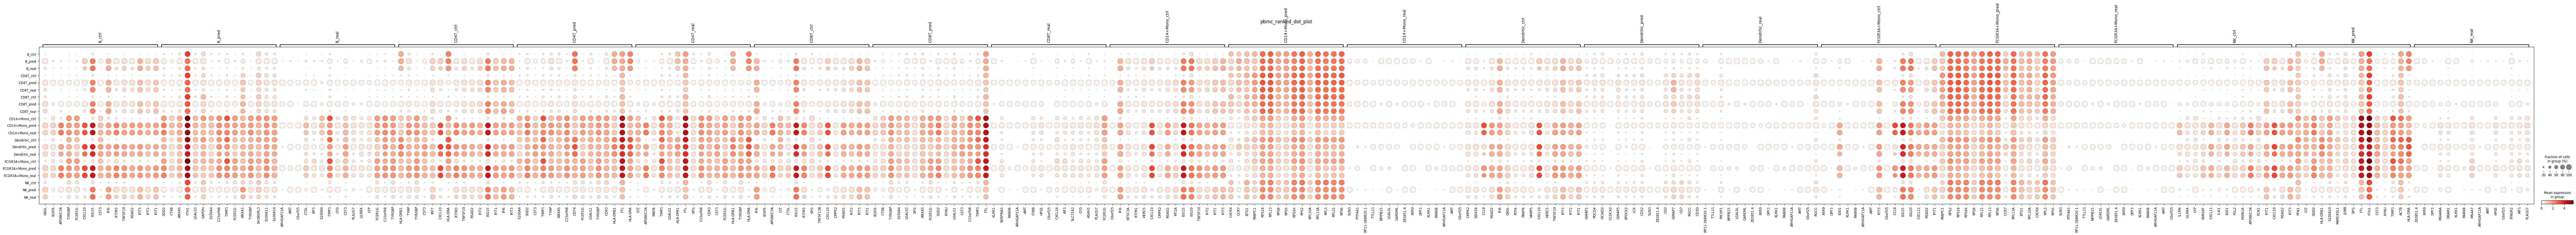

/opt/conda/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/opt/conda/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/opt/conda/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

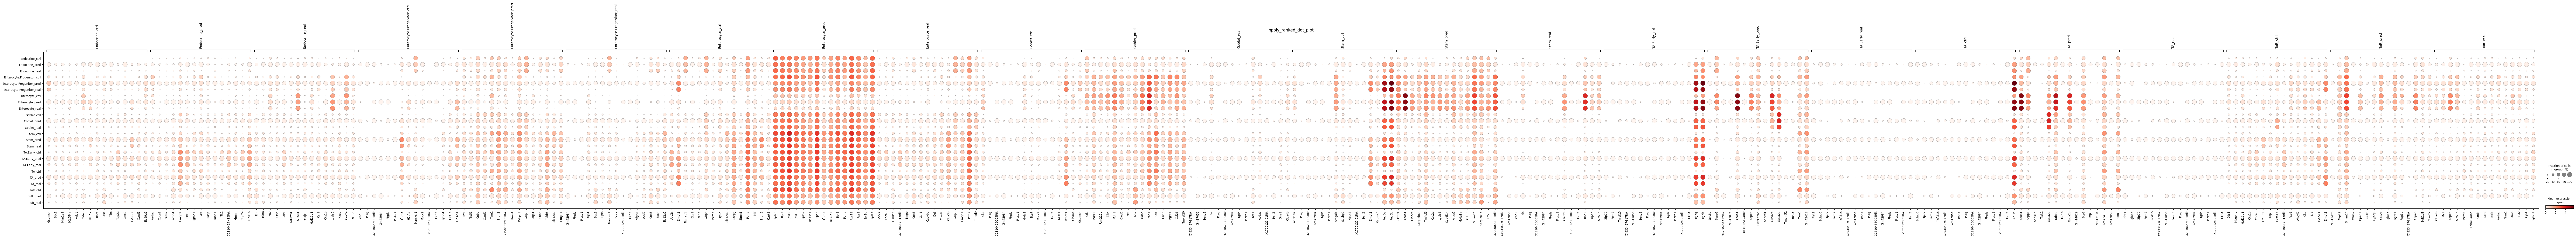

/opt/conda/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/opt/conda/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/opt/conda/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

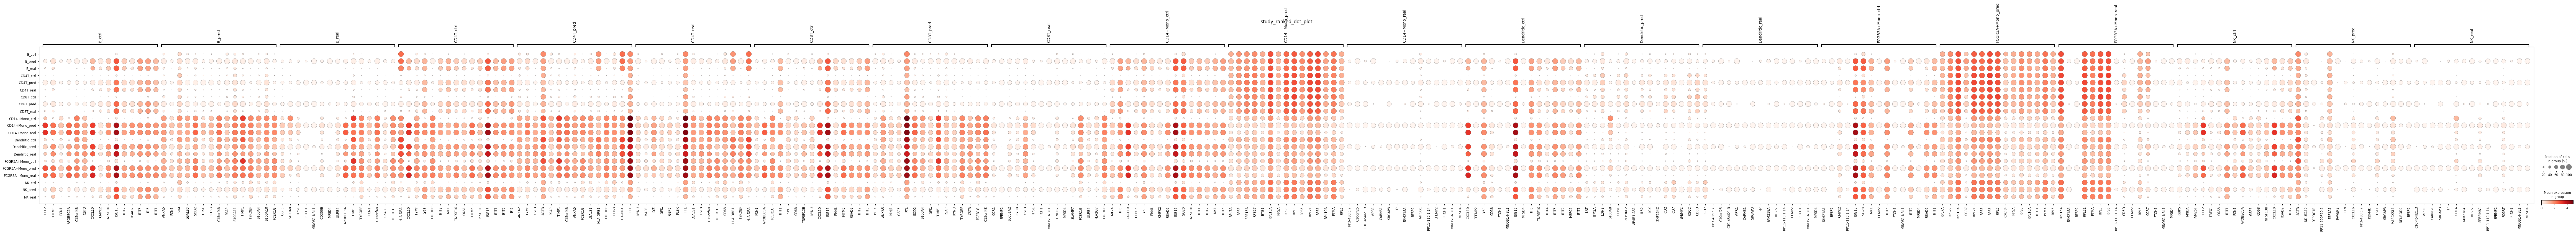

In [11]:
plot_dot_plot(pbmc_all_data, "pbmc")
plot_dot_plot(hpoly_all_data, "hpoly")
plot_dot_plot(study_all_data, "study")

In [12]:
def plot_dotplot(adata, name = "pbmc"):
    sc.set_figure_params(fontsize=14)
    sc.pl.dotplot(adata, var_names = gene_lists[name], groupby="condition", show=True, standard_scale = 'var',save = f"plot/{name}_dotplot", title = f"{name}_dotplot")

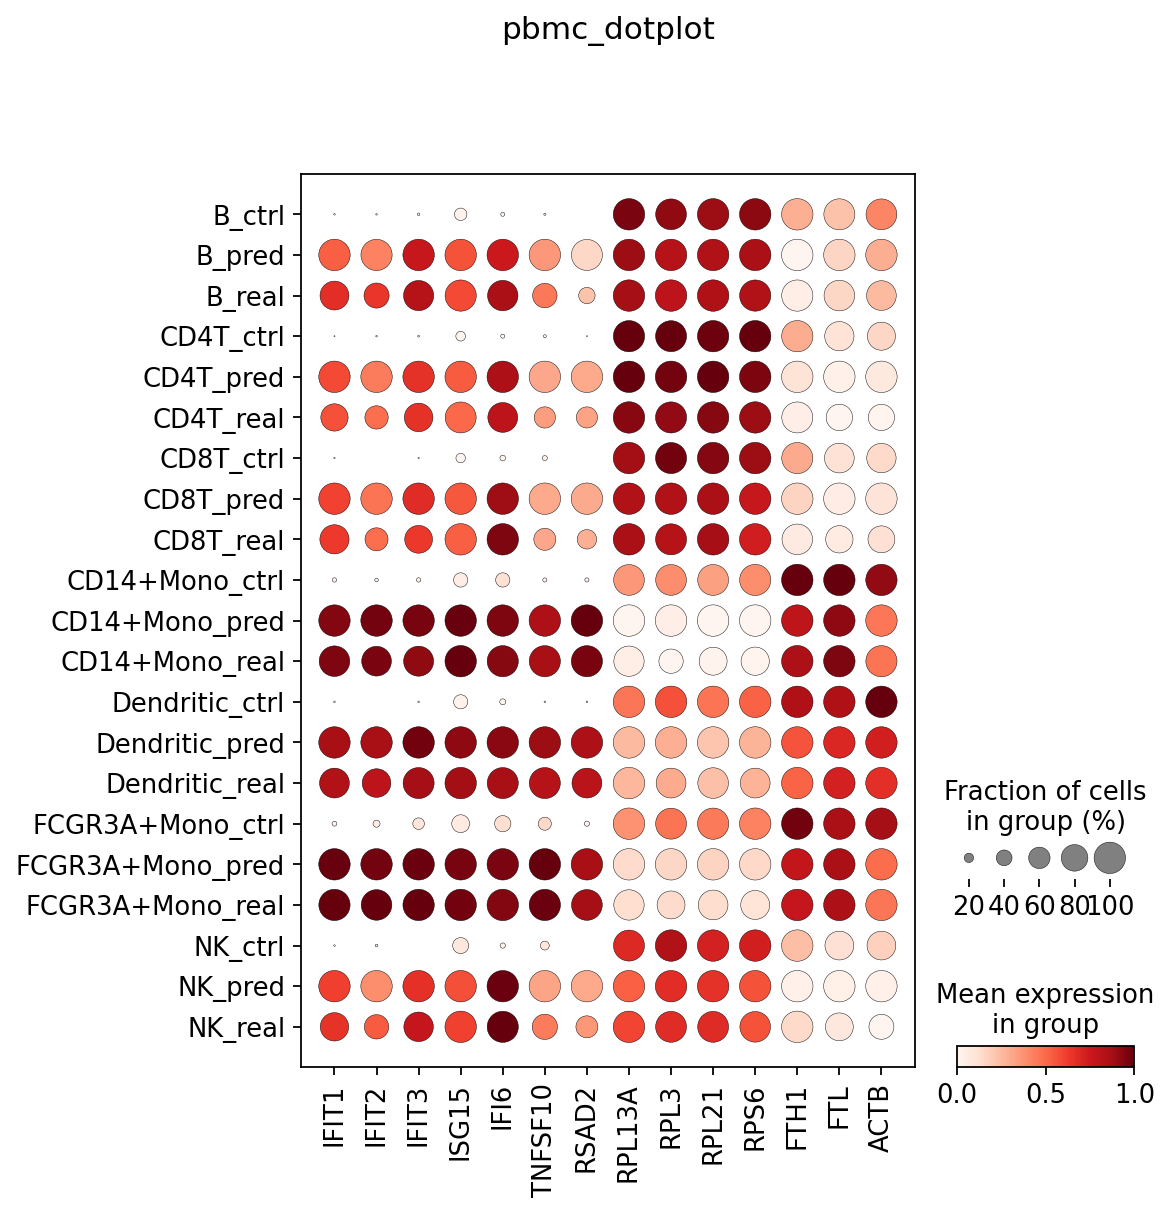

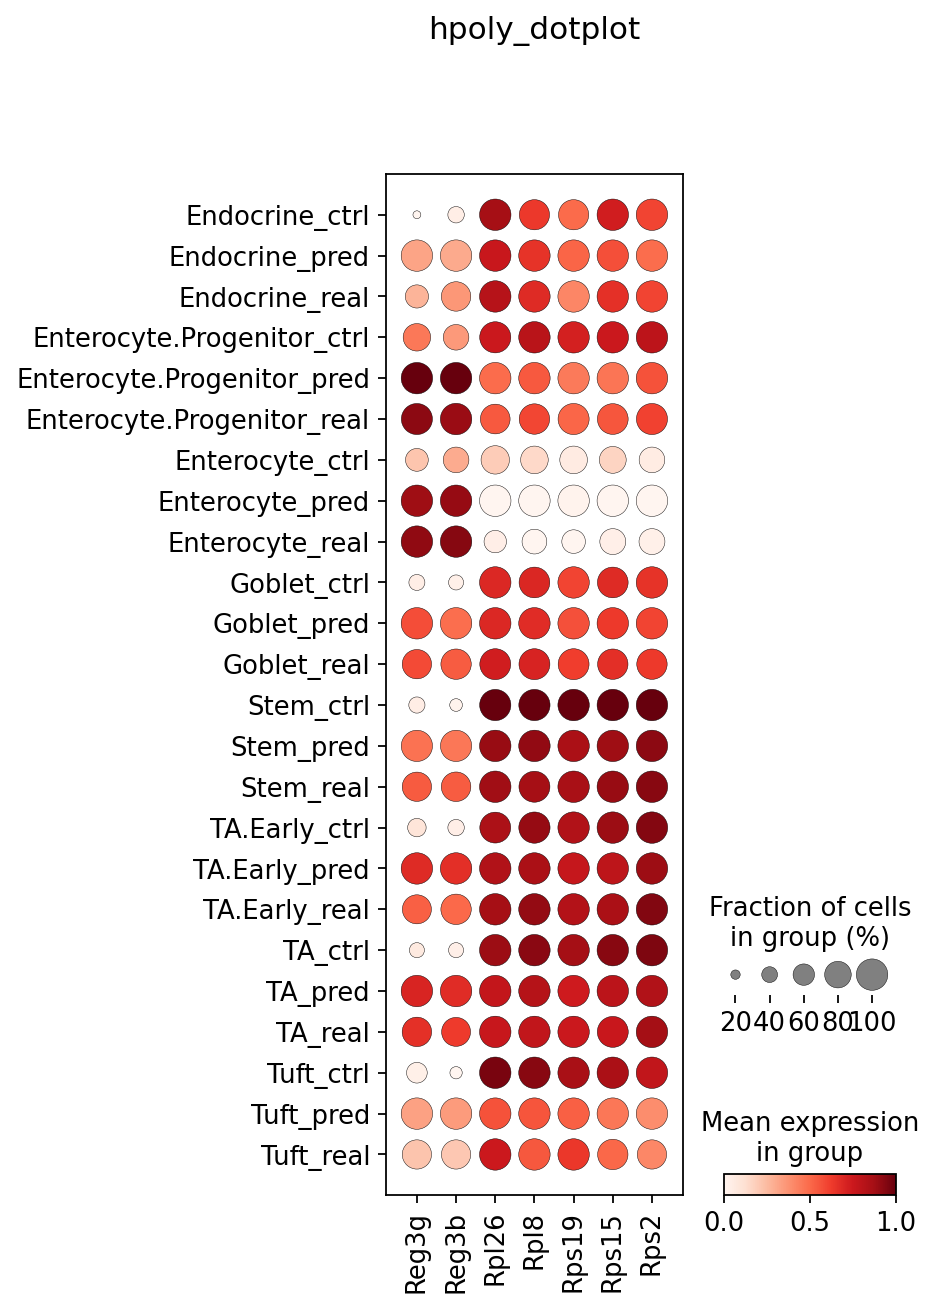

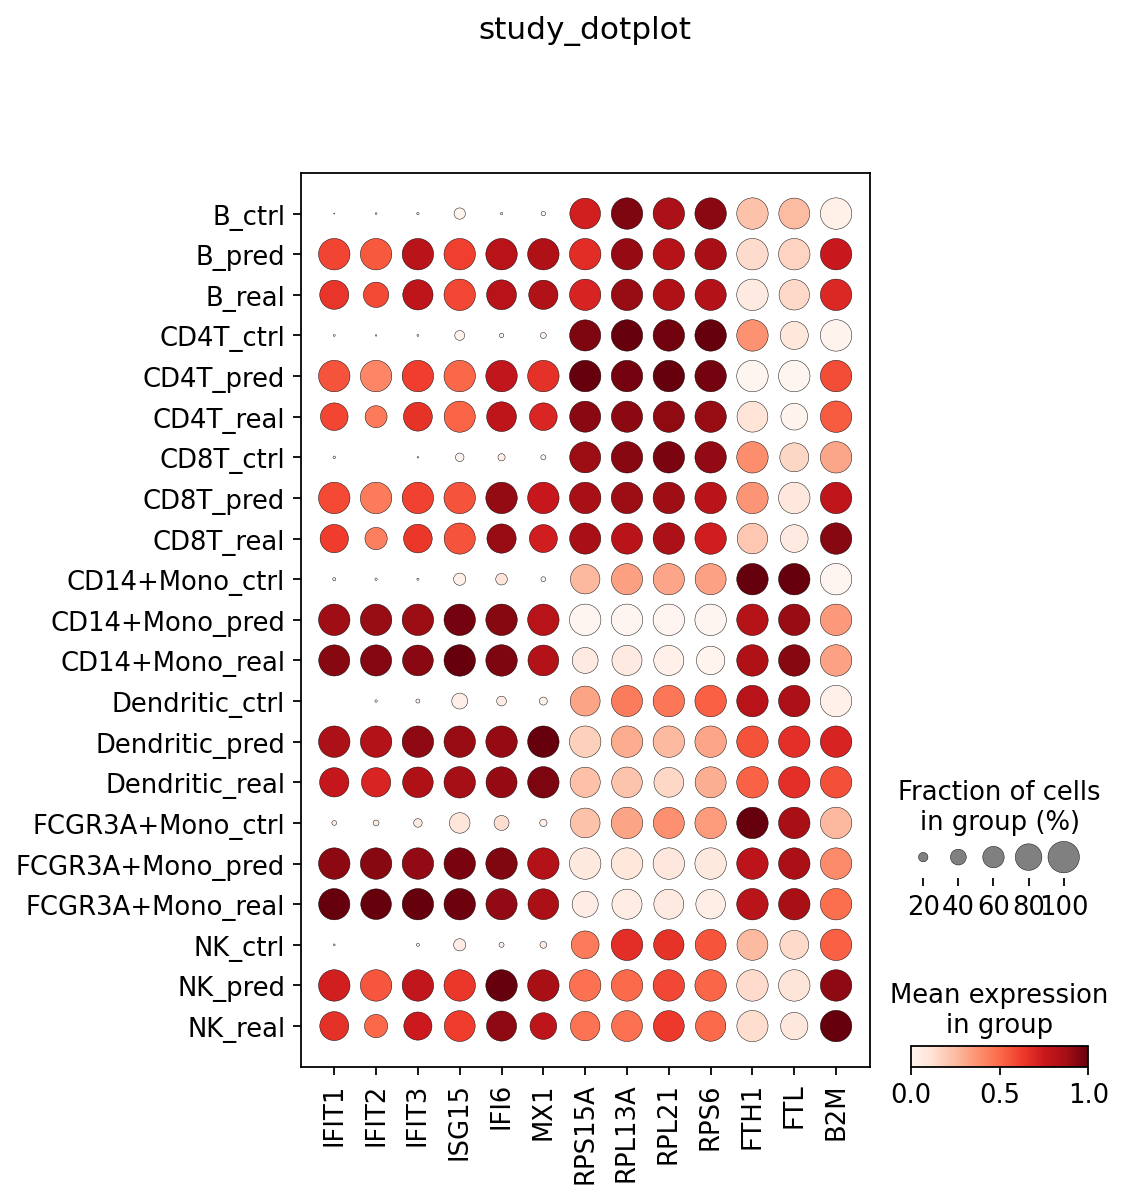

In [13]:
plot_dotplot(pbmc_all_data, "pbmc")
plot_dotplot(hpoly_all_data, "hpoly")
plot_dotplot(study_all_data, "study")

In [14]:
def plot_boxplot(recon_data,
                 path_to_save,
                 method, 
                 data_name="pbmc", 
                 n_genes=100, 
                 restore=True, 
                 score_type="median_score", 
                 y_measure="SE",
                 scale="log"):
    if data_name == "pbmc":
        stim_key = "stimulated"
        ctrl_key = "control"
        cell_type_key = "cell_type"
        train = sc.read("../data/train_pbmc.h5ad")
    elif data_name == "hpoly":
        stim_key = "Hpoly.Day10"
        ctrl_key = "Control"
        cell_type_key = "cell_label"
        train = sc.read("../data/train_hpoly.h5ad")
    elif data_name == "salmonella":
        stim_key = "Salmonella"
        ctrl_key = "Control"
        cell_type_key = "cell_label"
        train = sc.read("../data/train_salmonella.h5ad")
    import matplotlib
    matplotlib.rc('ytick', labelsize=14)
    matplotlib.rc('xtick', labelsize=14)
    conditions = {"ctrl": ctrl_key, "stim": stim_key}

    sc.settings.figdir = path_to_save

    diff_genes = score(train, data_name, n_deg=10 * n_genes, n_genes=500, cell_type_key=cell_type_key, conditions=conditions,
                       sortby=score_type)
    diff_genes = diff_genes["genes"].tolist()
    
    # epsilon = 1e-7
    if not restore:
        n_cell_types = len(train.obs[cell_type_key].unique().tolist())
        all_scores = np.zeros(shape=(n_cell_types * 10 * n_genes, 1))
        for bin_idx in range(10):
            for cell_type_idx, cell_type in enumerate(train.obs[cell_type_key].unique().tolist()):
                real_stim = recon_data[(recon_data.obs[cell_type_key] == cell_type) & (
                        recon_data.obs["condition"] == f"{cell_type}_real_stim")]
                pred_stim = recon_data[(recon_data.obs[cell_type_key] == cell_type) & (
                        recon_data.obs["condition"] == f"{cell_type}_pred_stim")]

                real_stim = real_stim[:, diff_genes[bin_idx * n_genes:(bin_idx + 1) * n_genes]]
                pred_stim = pred_stim[:, diff_genes[bin_idx * n_genes:(bin_idx + 1) * n_genes]]
                if sparse.issparse(real_stim.X):
                    real_stim_avg = np.average(real_stim.X.A, axis=0)
                    pred_stim_avg = np.average(pred_stim.X.A, axis=0)
                else:
                    real_stim_avg = np.average(real_stim.X, axis=0)
                    pred_stim_avg = np.average(pred_stim.X, axis=0)
                if y_measure == "SE":  # (x - xhat) ^ 2
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "AE":  # x - xhat
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "AE:x":  # (x - xhat) / x
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures = np.divide(y_measures, real_stim_avg)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "SE:x^2":  # (x - xhat) / x^2
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.divide(y_measures, np.power(real_stim_avg, 2))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "AE:max(x, 1)":  # (x - xhat) / max(x, 1)
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures = np.divide(y_measures, np.maximum(real_stim_avg, 1.0))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "SE:max(x, 1)^2":  # (x - xhat)^2 / max(x, 1)^2
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.divide(y_measures, np.power(np.maximum(real_stim_avg, 1.0), 2))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "SE:max(x, 1)":  # (x - xhat)^2 / max(x, 1)
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.divide(y_measures, np.power(np.maximum(real_stim_avg, 1.0), 1.0))
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "1 - AE:x":  # 1 - ((x - xhat) / x)
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures = np.divide(y_measures, real_stim_avg)
                    y_measures = np.abs(1.0 - y_measures)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "1 - SE:x^2":  # 1 - ((x - xhat) / x)^2
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.divide(y_measures, np.power(real_stim_avg, 2))
                    y_measures = np.abs(1.0 - y_measures)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "1 - AE:max(x, 1)":  # 1 - ((x - xhat) / max(x, 1.0))
                    y_measures = np.abs(real_stim_avg - pred_stim_avg)
                    y_measures = np.true_divide(y_measures, np.maximum(real_stim_avg, 1.0))
                    y_measures = np.abs(1.0 - y_measures)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                elif y_measure == "1 - SE:max(x, 1)^2":  # 1 - ((x - xhat) / max(x, 1.0))
                    y_measures = np.abs(np.square(real_stim_avg - pred_stim_avg))
                    y_measures = np.true_divide(y_measures, np.power(np.maximum(real_stim_avg, 1.0), 2))
                    y_measures = np.abs(1.0 - y_measures)
                    y_measures_reshaped = np.reshape(y_measures, (-1,))
                if scale == "log":
                    y_measures_reshaped = np.log(y_measures_reshaped)                    
                start = n_cell_types * n_genes * bin_idx
                all_scores[start + n_genes * cell_type_idx:start + n_genes * (cell_type_idx + 1),
                0] = y_measures_reshaped
        all_scores = np.reshape(all_scores, (-1,))
        print(all_scores.shape)
    else:
        all_scores = np.loadtxt(
            fname=f"./boxplots/Top_{10 * n_genes}/{y_measure}/y_measures_{score_type}_{n_genes}_({y_measure}).txt",
            delimiter=",")
    import seaborn as sns
    conditions = [f"Bin-{i // (n_cell_types * n_genes) + 1}" for i in range(n_cell_types * 10 * n_genes)]
    all_scores_df = pd.DataFrame({"scores": all_scores})
    all_scores_df["conditions"] = conditions
    ax = sns.boxplot(data=all_scores_df, x="conditions", y="scores", whis=np.inf)
    if scale != "log" and y_measure == "AE:max(x, 1)":
        ax.set_ylim(0.0, 1.75)
    elif scale != "log" and y_measure == "SE:max(x, 1)":
        ax.set_ylim(0.0, 3.0)
    elif y_measure == "AE:max(x, 1)":
        ax.set_ylim(-15.0, 0.5)
    elif y_measure == "SE:max(x, 1)":
        ax.set_ylim(-30.5, 1.0)
    xlabels = ['Bin-%i' % i for i in range(10)]
    ax.set_xticklabels(xlabels, rotation=90)
    if y_measure == "SE":
        plt.ylabel("(x - xhat) ^ 2")
    elif y_measure == "AE":
        plt.ylabel("|x - xhat|")
    elif y_measure == "AE:x":
        plt.ylabel("|x - xhat| / x")
    elif y_measure == "SE:x^2":
        plt.ylabel("((x - xhat) ^ 2) / (x ^ 2)")
    elif y_measure == "AE:max(x, 1)":
        if scale == "log":
            plt.ylabel("log(|x - xhat| / max(x, 1))")
        else: 
            plt.ylabel("|x - xhat| / max(x, 1)")
    elif y_measure == "SE:max(x, 1)^2":
        plt.ylabel("(x - xhat)^2 / max(x, 1)^2")
    elif y_measure == "SE:max(x, 1)":
        if scale == "log":
            plt.ylabel("log((x - xhat)^2 / max(x, 1))")
        else:
            plt.ylabel("(x - xhat)^2 / max(x, 1)")
    elif y_measure == "1 - AE:x":
        plt.ylabel("1 - (|x - xhat| / x)")
    elif y_measure == "1 - SE:x^2":
        plt.ylabel("1 - ((x - xhat)^2 / x^2)")
    elif y_measure == "1 - AE:max(x, 1)":
        plt.ylabel("1 - (|x - xhat| / max(x, 1))")
    elif y_measure == "1 - SE:max(x, 1)^2":
        plt.ylabel("1 - ((x - xhat)^2 / max(x, 1)^2)")
    plt.tight_layout()
    plt.savefig(path_to_save, dpi=300)
    plt.show()
    plt.close()

    all_scores = np.reshape(all_scores, (-1, 1))

In [15]:
def score(adata, data_name, n_deg=10, n_genes=1000, condition_key="condition", cell_type_key="cell_type",
          conditions={"stim": "stimulated", "ctrl": "control"},
          sortby="median_score"):
    import scanpy as sc
    import numpy as np
    from scipy.stats import entropy
    import pandas as pd
    sc.tl.rank_genes_groups(adata, groupby=condition_key, method="wilcoxon", n_ge下午nes=n_genes)
    gene_names = adata.uns["rank_genes_groups"]['names'][conditions['stim']]
    gene_lfcs = adata.uns["rank_genes_groups"]['logfoldchanges'][conditions['stim']]
    diff_genes_df = pd.DataFrame({"names": gene_names, "lfc": gene_lfcs})
    diff_genes = diff_genes_df["names"].tolist()[:n_genes]
    print(len(diff_genes))

    adata_deg = adata[:, diff_genes].copy()
    cell_types = adata_deg.obs[cell_type_key].cat.categories.tolist()
    lfc_temp = np.zeros((len(cell_types), n_genes))
    for j, ct in enumerate(cell_types):
        if cell_type_key == "cell_type":  # if data is pbmc
            stim = adata_deg[(adata_deg.obs[cell_type_key] == ct) &
                             (adata_deg.obs[condition_key] == conditions["stim"])].X.mean(0).A1
            ctrl = adata_deg[(adata_deg.obs[cell_type_key] == ct) &
                             (adata_deg.obs[condition_key] == conditions["ctrl"])].X.mean(0).A1
        else:
            stim = adata_deg[(adata_deg.obs[cell_type_key] == ct) &
                             (adata_deg.obs[condition_key] == conditions["stim"])].X.mean(0)
            ctrl = adata_deg[(adata_deg.obs[cell_type_key] == ct) &
                             (adata_deg.obs[condition_key] == conditions["ctrl"])].X.mean(0)
        lfc_temp[j] = np.abs((stim - ctrl)[None, :])
    norm_lfc = lfc_temp / lfc_temp.sum(0).reshape((1, n_genes))
    ent_scores = entropy(norm_lfc)
    median = np.median(lfc_temp, axis=0)
    med_scores = np.max(np.abs((lfc_temp - median)), axis=0)
    df_score = pd.DataFrame({"genes": adata_deg.var_names.tolist(), "median_score": med_scores,
                             "entropy_score": ent_scores})
    if sortby == "median_score":
        return df_score.sort_values(by=['median_score'], ascending=False).iloc[:n_deg, :]
    else:
        return df_score.sort_values(by=['entropy_score'], ascending=False).iloc[:n_deg, :]

In [16]:
def stacked_violin_plot(recon_data, method, data_name="pbmc", cmap_name = 'viridis'):
    if data_name == "pbmc":
        stim_key = "stimulated"
        ctrl_key = "control"
        cell_type_key = "cell_type"
        valid = sc.read("../data/valid_pbmc.h5ad")
    elif data_name == "hpoly":
        stim_key = "Hpoly.Day10"
        ctrl_key = "Control"
        cell_type_key = "cell_label"
        valid = sc.read("../data/valid_hpoly.h5ad")
    elif data_name == "study":
        stim_key = "stimulated"
        ctrl_key = "control"
        cell_type_key = "cell_type"
        valid = sc.read("../data/valid_study.h5ad")
    else:
        stim_key = "stimulated"
        ctrl_key = "control"
        cell_type_key = "cell_type"
        valid = sc.read("../data/train_pbmc.h5ad")
    conditions = {"ctrl": ctrl_key, "stim": stim_key}

    diff_genes = score(valid, data_name, n_deg=10, n_genes=500, cell_type_key=cell_type_key, conditions=conditions,
                       sortby="median_score")
    diff_genes = diff_genes["genes"].tolist()
#     plt.fig.subplots_adjust() 
    sc.pl.stacked_violin(recon_data,
                         var_names=diff_genes,
                         groupby="condition",
                         cmap = cmap_name, 
                         save=f"plot/{data_name}_{method}.pdf",
                         swap_axes=True,
                         title = f"{data_name}_{method}_violin")

In [17]:
# def plot_stacked_violin(scperb_adata, scgen_adata, data_name, cmap_name):
#     stacked_violin_plot(scperb_adata, "scperb", data_name, cmap_name)
#     stacked_violin_plot(scgen_adata, "scgen", data_name, cmap_name)

In [18]:
# for cmap_name in cmap_names:
#     stacked_violin_plot(CVAE_pbmc_all_data, "CVAE", "pbmc", cmap_name)
#     stacked_violin_plot(STGAN_pbmc_all_data, "STGAN", "pbmc", cmap_name)
#     stacked_violin_plot(WGAN_pbmc_all_data, "WGAN", "pbmc", cmap_name)
#     plot_stacked_violin(pbmc_all_data, scgen_pbmc_all_data, "pbmc", cmap_name)
#     plot_stacked_violin(hpoly_all_data, scgen_hpoly_all_data, "hpoly", cmap_name)
#     plot_stacked_violin(study_all_data, scgen_study_all_data, "study", cmap_name)

In [19]:
# import scipy.sparse as sparse
# import pandas as pd
# import matplotlib.pyplot as plt
# plot_boxplot(recon_data=pbmc_all_data, 
#              path_to_save = "figure/scPerb__pbmc_boxplot.pdf",
#              method="scPerb",
#              data_name="pbmc", 
#              n_genes=5, 
#              restore=False, 
#              score_type="median_score", 
#              y_measure="AE:max(x, 1)", 
#              scale="normal")

In [20]:
# plot_boxplot(recon_data=scgen_pbmc_all_data, 
#              path_to_save = "figure/scGen__pbmc_boxplot.pdf",
#              method="scGen",
#              data_name="pbmc", 
#              n_genes=50, 
#              restore=False, 
#              score_type="median_score", 
#              y_measure="AE:max(x, 1)", 
#              scale="normal")